# **Support Vector Regression (SVR) A Step-by-Step Implementation**

This notebook demonstrates the implementation of Support Vector Regression (SVR) using Python with the scikit-learn library. The goal is to predict salaries based on position levels in a dataset, using SVR to model the relationship.

# Support Vector Regression (SVR)

**Support Vector Regression (SVR)** is a type of **Support Vector Machine (SVM)** used for regression tasks. Unlike traditional regression models that aim to minimize the error between predicted and actual values, SVR tries to fit the best line within a specified margin. This characteristic makes SVR particularly robust and capable of handling high-dimensional data and non-linear relationships.

## Importing the libraries

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
# Read the dataset
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [10]:
# separate as independent and dependent variables.
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [11]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [12]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [13]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [17]:
# scale using standardscaler
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [18]:
# Print Scaled X
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [19]:
# Print scaled y
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [20]:
# Train SVR model
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf') # This is none linear kernel rbf
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [31]:
# Pass new value
new_value = 6.5

# pass through scaler
scaled_new_value =sc_X.transform([[new_value]])

# Get prediction
prediction = regressor.predict(scaled_new_value)

# reshaped prediction to pass through invers scaler
reshaped_prediction = prediction.reshape(-1,1)

# revers scaling.
sc_y.inverse_transform(reshaped_prediction)

array([[0.01150915]])

## Visualising the SVR results

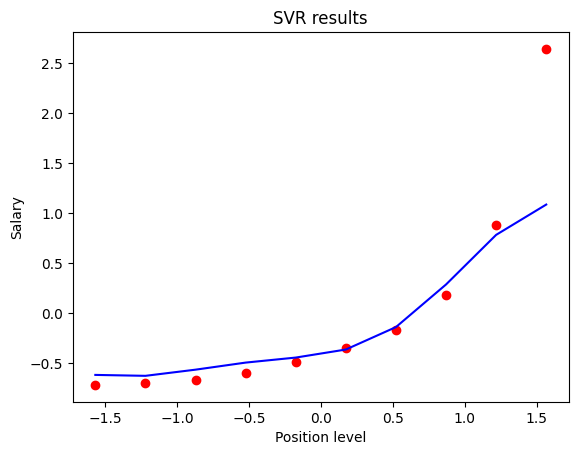

In [32]:
# plot SVR results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('SVR results')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results with smoother curve

<ipython-input-33-7c0164da1aef>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


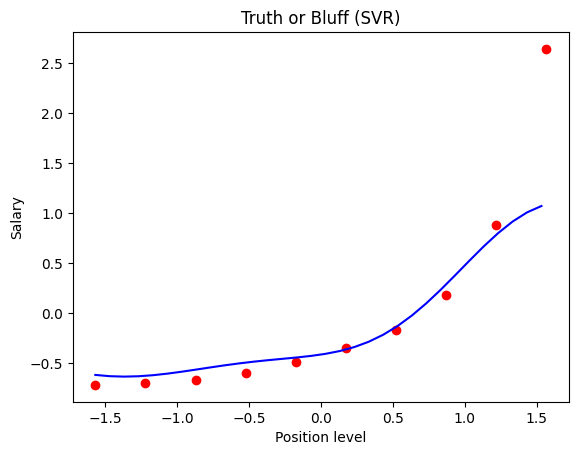

In [33]:
# plot SVR results
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()